In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import solar_loader as sl

In [4]:
# load solar data
SOLAR_TILT = 30 # degrees
DC_SYSTEM_SIZE = 20 # kW
solarData = sl.SolarData(SOLAR_TILT, DC_SYSTEM_SIZE)
gen = solarData.get_full_data()

In [5]:
# load a carbon trace
cf = pd.read_csv('CISO_direct_emissions.csv', parse_dates=True)
cf['datetime'] = pd.to_datetime(cf['UTC time'], utc=True)
cf.drop(["Unnamed: 0", "UTC time"], axis=1, inplace=True)
cf.set_index('datetime', inplace=True)

In [6]:
display(gen)

,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,GHI,Solar Zenith Angle,Solar Elevation Angle,GTI,Solar Generation (kWh)
datetime,,,,,,,,,,,,,
2019-01-01 00:00:00,0,0,-6.0,0.14,4.0,49.72,3.5,972,0,166.60,-76.60,0.0,0.0
2019-01-01 01:00:00,0,0,-6.0,0.14,3.9,51.16,3.1,973,0,156.62,-66.62,0.0,0.0
2019-01-01 02:00:00,0,0,-6.2,0.14,4.2,50.79,3.0,973,0,144.63,-54.63,0.0,0.0
2019-01-01 03:00:00,0,0,-6.9,0.14,4.4,48.52,2.9,973,0,132.25,-42.25,0.0,0.0
2019-01-01 04:00:00,0,0,-7.0,0.14,4.3,48.74,2.7,974,0,119.90,-29.90,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0,0,2.5,0.13,2.9,62.78,9.2,969,0,121.52,-31.52,0.0,0.0
2021-12-31 20:00:00,0,0,2.4,0.13,3.6,64.60,8.7,969,0,133.88,-43.88,0.0,0.0
2021-12-31 21:00:00,0,0,2.1,0.13,3.9,65.10,8.3,969,0,146.24,-56.24,0.0,0.0


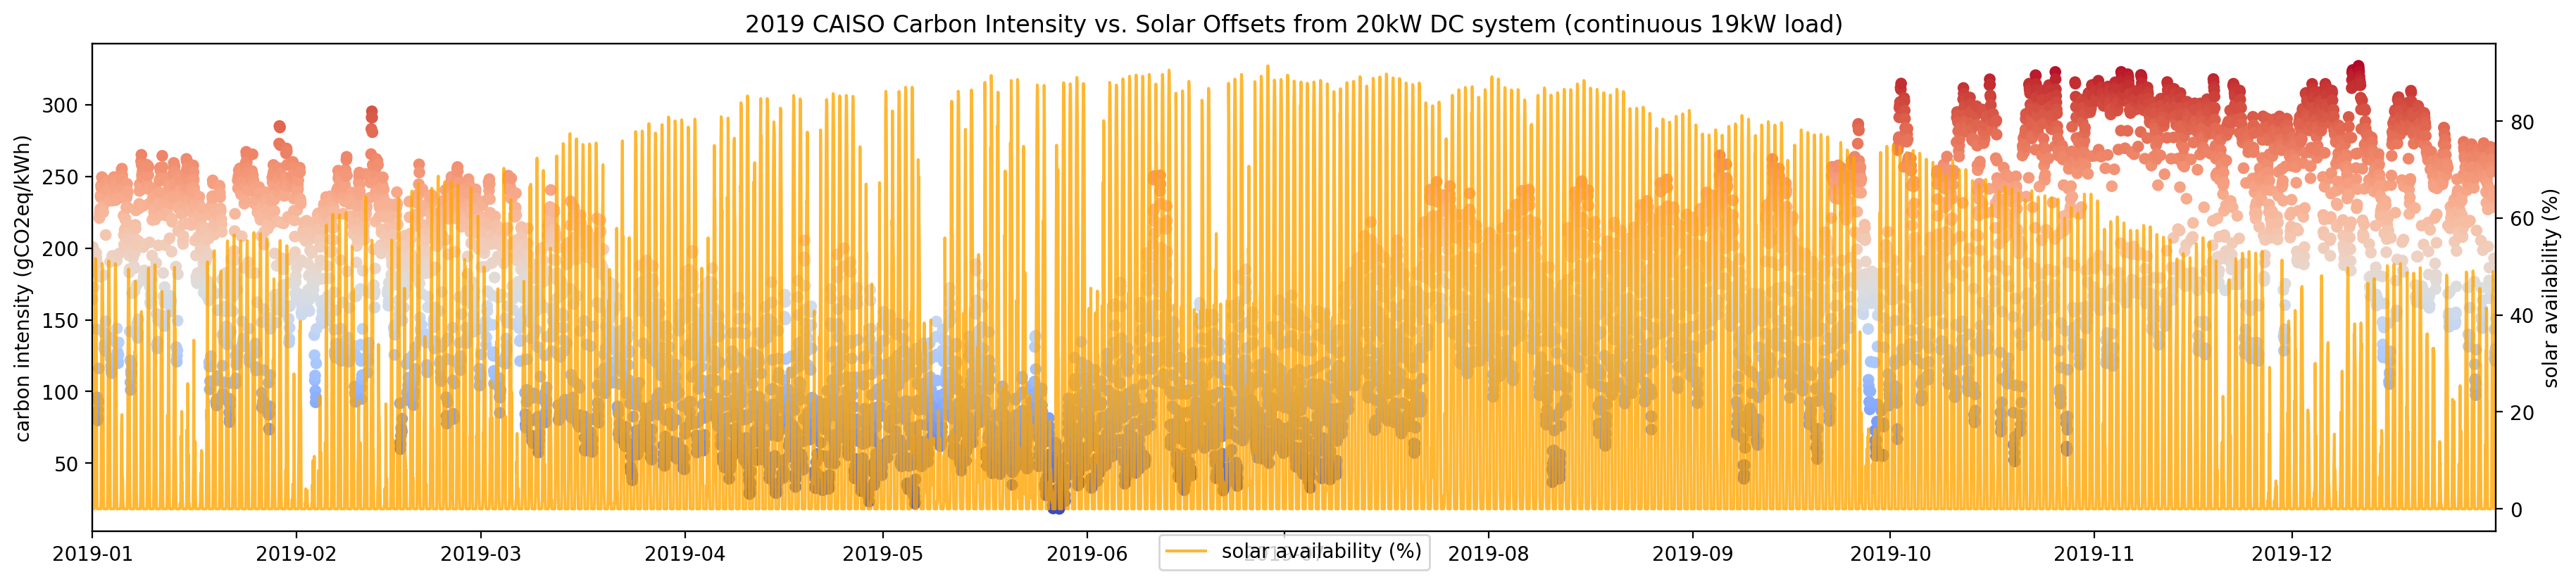

In [15]:
# for each hour, plot a bar graph, where the top half is the percentage of energy not met by solar, and the bottom half is the percentage of energy met by solar
# the color of the top half is based on the carbon intensity
# the color of the bottom half is yellow
import matplotlib

# just 2020 values
cf20 = cf[cf.index.year == 2020]
solar20 = gen[gen.index.year == 2020]

# raw carbon values
carbon = np.array(cf20['carbon_intensity'].to_list())

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

# raw solar values
solar = np.array(solar20['Solar Generation (kWh)'].to_list())
# normalized for a 20kW load
solarGen = (solar / 20) * 100

fig, ax1 = plt.subplots(figsize=(18,4), dpi=200)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(cf20.index, solarGen, color='orange', label="solar availability (%)", alpha=0.8)
ax1.scatter(cf20.index, carbon, c=my_cmap(rescale(carbon)), edgecolor='none')

plt.xlim(cf20.index[0], cf20.index[-1])

norm = matplotlib.colors.Normalize(vmin=min(carbon),vmax=max(carbon))
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("coolwarm"), norm=norm)
sm.set_array([])
plt.tight_layout()
# put the legend at the bottom with two columns
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))
ax2.set_ylabel("solar availability (%)")
ax1.set_ylabel("carbon intensity (gCO2eq/kWh)")
plt.title("2020 CAISO Carbon Intensity vs. Solar Offsets from 20kW DC system (continuous 20kW load)")

plt.show()

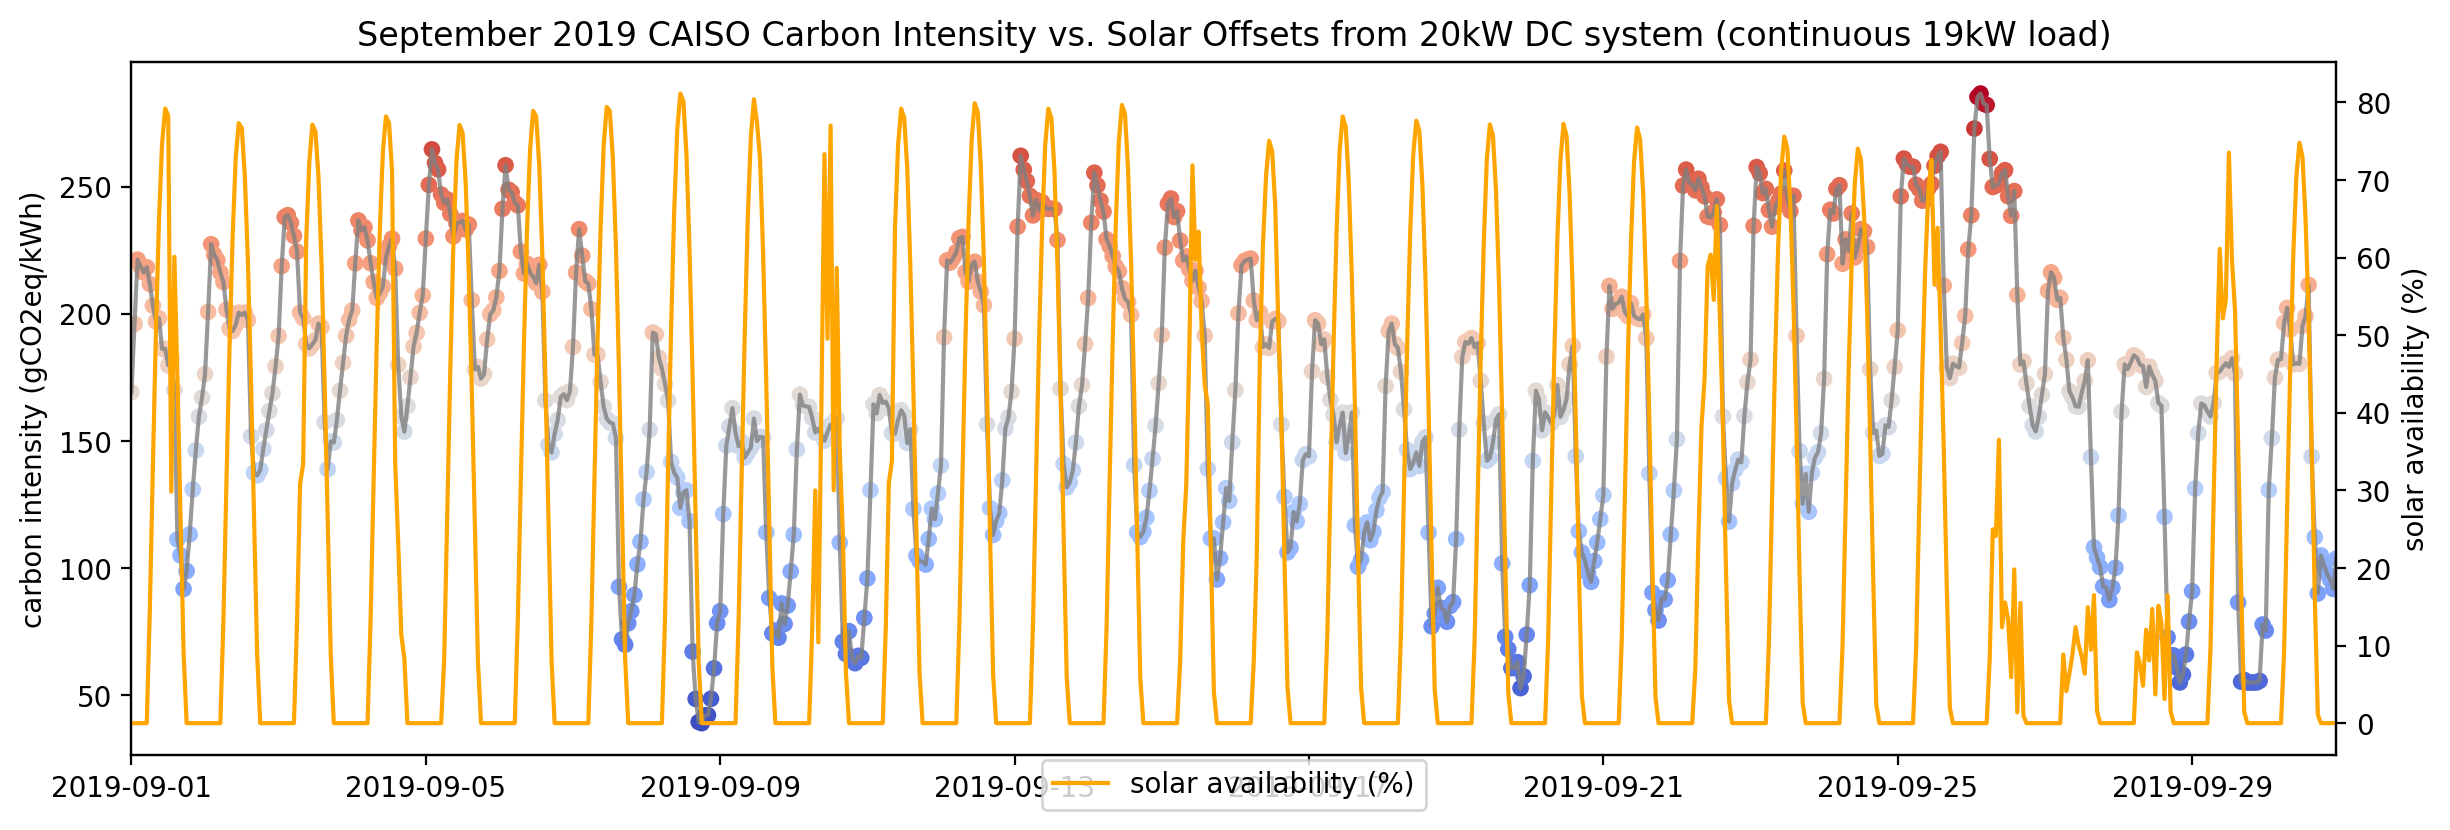

In [31]:
# for each hour, plot a bar graph, where the top half is the percentage of energy not met by solar, and the bottom half is the percentage of energy met by solar
# the color of the top half is based on the carbon intensity
# the color of the bottom half is yellow
import matplotlib

# just september 2019 values
cf19 = cf.loc['2019-09-01':'2019-09-30']
solar19 = gen.loc['2019-09-01':'2019-09-30']

# raw carbon values
carbon = np.array(cf19['carbon_intensity'].to_list())

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

# raw solar values
solar = np.array(solar19['Solar Generation (kWh)'].to_list())
# normalized for a 19kW load
solarGen = (solar / 19) * 100

fig, ax1 = plt.subplots(figsize=(12,4), dpi=200)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(cf19.index, solarGen, color='orange', label="solar availability (%)")
ax1.plot(cf19.index, carbon, color='gray', alpha=0.8)
ax1.scatter(cf19.index, carbon, c=my_cmap(rescale(carbon)), edgecolor='none')

plt.xlim(cf19.index[0], cf19.index[-1])

norm = matplotlib.colors.Normalize(vmin=min(carbon),vmax=max(carbon))
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("coolwarm"), norm=norm)
sm.set_array([])
plt.tight_layout()
# put the legend at the bottom with two columns
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))
ax2.set_ylabel("solar availability (%)")
ax1.set_ylabel("carbon intensity (gCO2eq/kWh)")
plt.title("September 2019 CAISO Carbon Intensity vs. Solar Offsets from 20kW DC system (continuous 19kW load)")

plt.show()

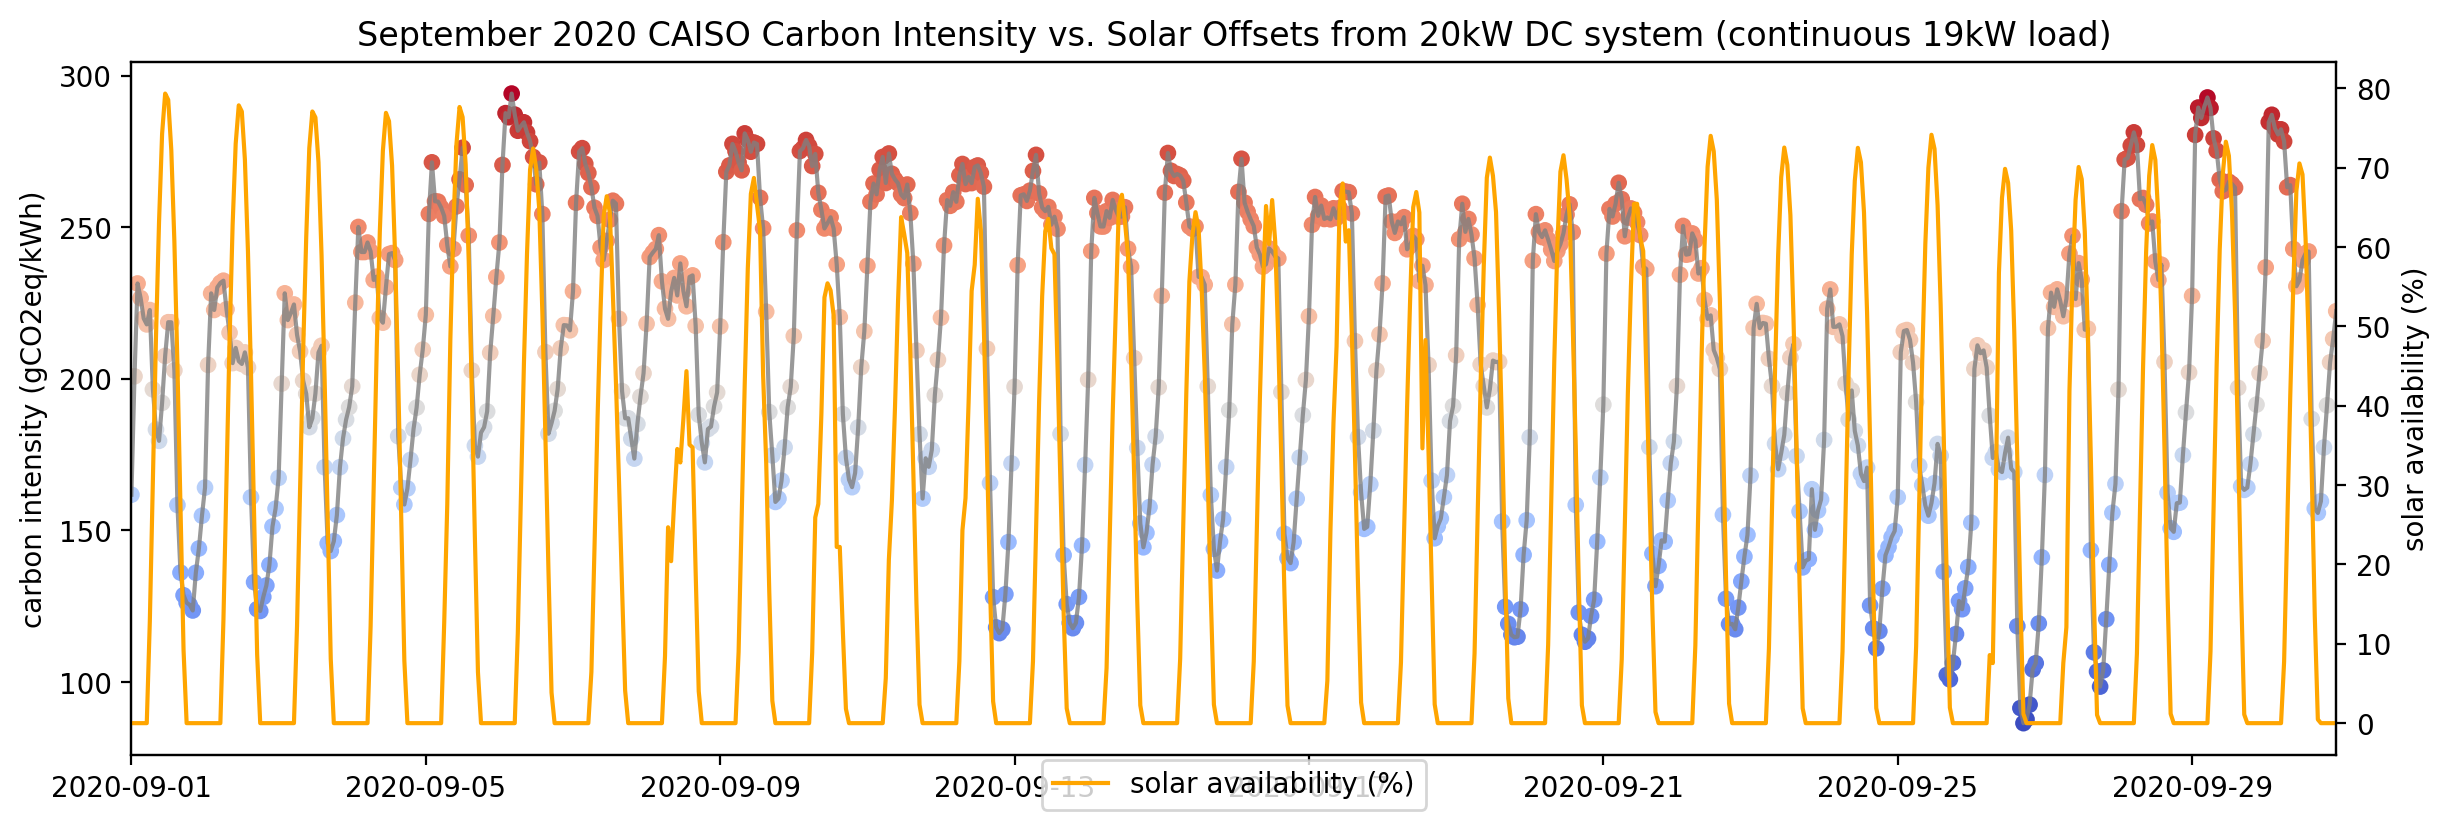

In [32]:
# for each hour, plot a bar graph, where the top half is the percentage of energy not met by solar, and the bottom half is the percentage of energy met by solar
# the color of the top half is based on the carbon intensity
# the color of the bottom half is yellow
import matplotlib

# just september 2020 values
cf20 = cf.loc['2020-09-01':'2020-09-30']
solar20 = gen.loc['2020-09-01':'2020-09-30']

# raw carbon values
carbon = np.array(cf20['carbon_intensity'].to_list())

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

# raw solar values
solar = np.array(solar20['Solar Generation (kWh)'].to_list())
# normalized for a 19kW load
solarGen = (solar / 19) * 100

fig, ax1 = plt.subplots(figsize=(12,4), dpi=200)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(cf20.index, solarGen, color='orange', label="solar availability (%)")
ax1.plot(cf20.index, carbon, color='gray', alpha=0.8)
ax1.scatter(cf20.index, carbon, c=my_cmap(rescale(carbon)), edgecolor='none')

plt.xlim(cf20.index[0], cf20.index[-1])

norm = matplotlib.colors.Normalize(vmin=min(carbon),vmax=max(carbon))
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("coolwarm"), norm=norm)
sm.set_array([])
plt.tight_layout()
# put the legend at the bottom with two columns
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))
ax2.set_ylabel("solar availability (%)")
ax1.set_ylabel("carbon intensity (gCO2eq/kWh)")
plt.title("September 2020 CAISO Carbon Intensity vs. Solar Offsets from 20kW DC system (continuous 19kW load)")

plt.show()

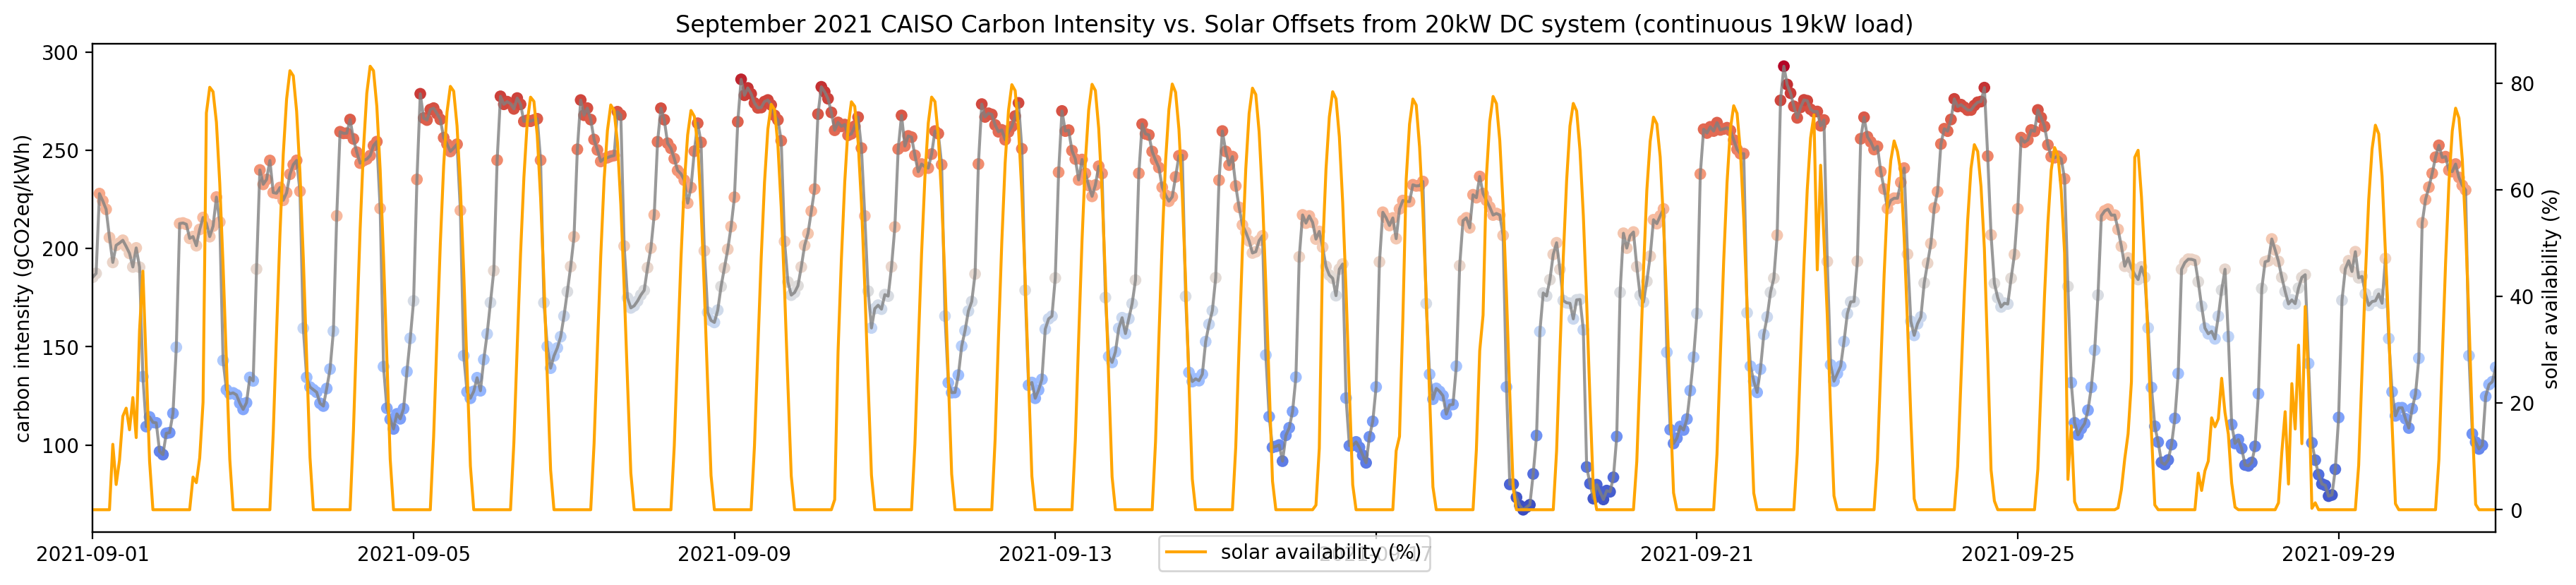

In [29]:
# for each hour, plot a bar graph, where the top half is the percentage of energy not met by solar, and the bottom half is the percentage of energy met by solar
# the color of the top half is based on the carbon intensity
# the color of the bottom half is yellow
import matplotlib

# just september 2021 values
cf21 = cf.loc['2021-09-01':'2021-09-30']
solar21 = gen.loc['2021-09-01':'2021-09-30']

# raw carbon values
carbon = np.array(cf21['carbon_intensity'].to_list())

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

# raw solar values
solar = np.array(solar21['Solar Generation (kWh)'].to_list())
# normalized for a 19kW load
solarGen = (solar / 19) * 100

fig, ax1 = plt.subplots(figsize=(18,4), dpi=200)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(cf21.index, solarGen, color='orange', label="solar availability (%)")
ax1.plot(cf21.index, carbon, color='gray', alpha=0.8)
ax1.scatter(cf21.index, carbon, c=my_cmap(rescale(carbon)), edgecolor='none')

plt.xlim(cf21.index[0], cf21.index[-1])

norm = matplotlib.colors.Normalize(vmin=min(carbon),vmax=max(carbon))
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("coolwarm"), norm=norm)
sm.set_array([])
plt.tight_layout()
# put the legend at the bottom with two columns
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))
ax2.set_ylabel("solar availability (%)")
ax1.set_ylabel("carbon intensity (gCO2eq/kWh)")
plt.title("September 2021 CAISO Carbon Intensity vs. Solar Offsets from 20kW DC system (continuous 19kW load)")

plt.show()

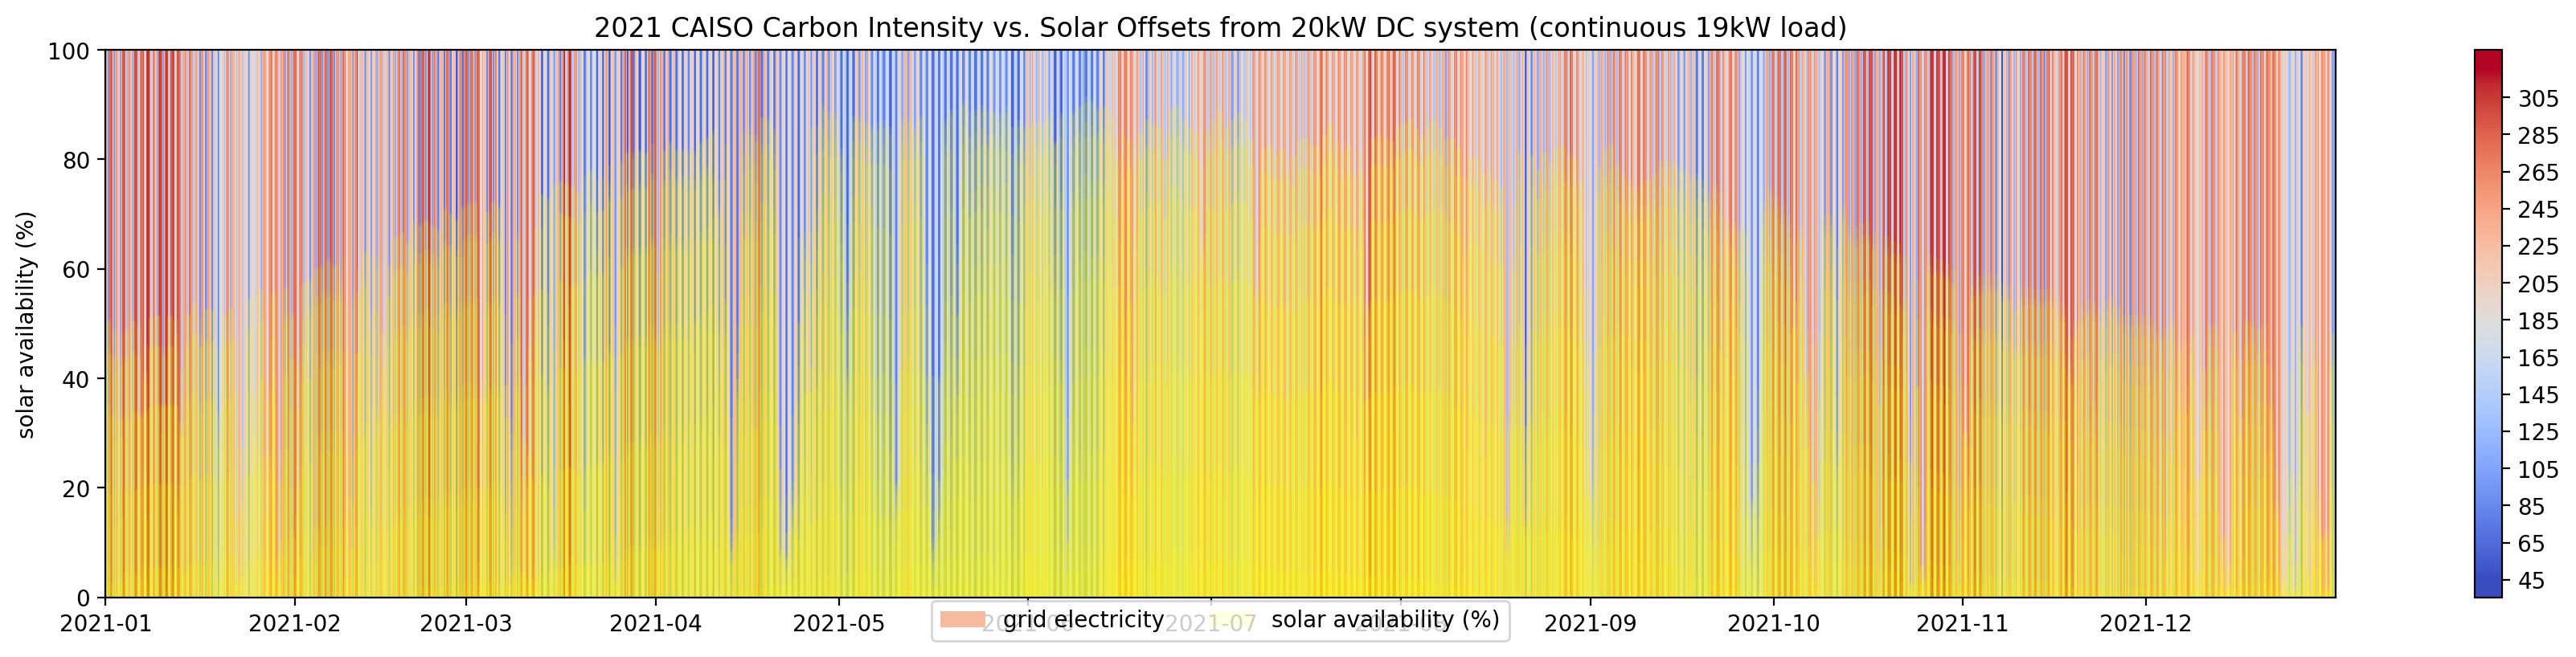

In [79]:
# for each hour, plot a bar graph, where the top half is the percentage of energy not met by solar, and the bottom half is the percentage of energy met by solar
# the color of the top half is based on the carbon intensity
# the color of the bottom half is yellow
import matplotlib

# just 2021 values
solar21 = gen[gen.index.year == 2021]
cf21 = cf[cf.index.year == 2021]

# raw carbon values
carbon = np.array(cf21['carbon_intensity'].to_list())

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

normalized = [100 for _ in carbon]

# raw solar values
solar = np.array(solar21['Solar Generation (kWh)'].to_list())
# normalized for a 20kW load
solarGen = (solar / 20) * 100

plt.figure(figsize=(18,4), dpi=200)
plt.bar(solar21.index, normalized, color=my_cmap(rescale(carbon)), label="grid electricity")
plt.bar(solar21.index, solarGen, color='yellow', label="solar availability (%)", alpha=0.1)
plt.ylim(0, 100)
plt.xlim(solar21.index[0], solar21.index[-1])

norm = matplotlib.colors.Normalize(vmin=min(carbon),vmax=max(carbon))
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("coolwarm"), norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(np.floor(min(carbon)), np.ceil(max(carbon)), 20), boundaries=np.arange(min(carbon)-10,max(carbon)+10,1))
plt.tight_layout()
# put the legend at the bottom with two columns
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))
plt.ylabel("solar availability (%)")
plt.title("2021 CAISO Carbon Intensity vs. Solar Offsets from 20kW DC system (continuous 20kW load)")

plt.show()

In [1]:
import pyximport; pyximport.install()
import functions as f
from scipy.special import lambertw
import math

U = 10
L = 0
beta = 20

# plot the threshold function on the interval (0,1)
alpha = 1 / (1 - (2*beta/U) + lambertw( ( ( (2*beta/U) + (L/U) - 1 ) * math.exp(2*beta/U) ) / math.e ) )
print(alpha)

function = []
for x in np.linspace(0,1,100):
    function.append(f.thresholdFunc(x, U, L, beta, alpha))

plt.plot(np.linspace(0,1,100), function)

/Users/adam/Library/Python/3.9/lib/python/site-packages/Cython/Compiler/Main.py:384: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /Users/adam/GitHub/roro-experiments/functions.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
/Users/adam/.pyxbld/temp.macosx-10.9-universal2-3.9/Users/adam/GitHub/roro-experiments/functions.c:4610:3: warning: code will never be executed [-Wunreachable-code]
  goto __pyx_L3_error;
  ^~~~~~~~~~~~~~~~~~~
/Users/adam/.pyxbld/temp.macosx-10.9-universal2-3.9/Users/adam/GitHub/roro-experiments/functions.c:6105:3: warning: code will never be executed [-Wunreachable-code]
  goto __pyx_L3_error;
  ^~~~~~~~~~~~~~~~~~~
/Users/adam/.pyxbld/temp.macosx-10.9-universal2-3.9/Users/adam/GitHub/roro-experiments/functions.c:6227:3: warning: code will never be executed [-Wunreachable-code]
  goto __pyx_L3_error;
  ^~~~~~~~~~~~~~~~~~~
/Users/adam/.pyxbld/temp.macosx-10.9-universal2-3.9

ImportError: Executing module /Users/adam/.pyxbld/lib.macosx-10.9-universal2-3.9/functions.cpython-39-darwin.so failed ["ModuleNotFoundError: No module named 'scipy'\n"]

In [10]:
from scipy import integrate

print(integrate.quad(f.thresholdFunc, 0.0, 0.05, args=(U,L,beta,alpha))[0])

print(87.24*0.1 + 20*0.1)

4.524899613851118
10.724


/Users/adam/miniforge3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


(3.373329702330749+0j)


<ipython-input-86-3bc6e39a553e>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  function.append(f.owtThreshold(U, L, alpha, x))


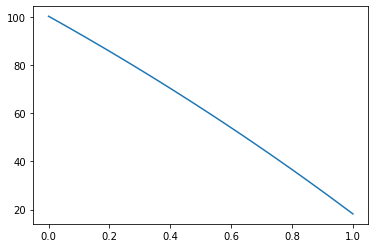

In [86]:
U = 338.74
L = 18.18
beta = 20

# plot the threshold function on the interval (0,1)
alpha = 1 / (1 + lambertw( ( (L/U) - 1 ) / math.e ) )
print(alpha)

function = []
for x in np.linspace(0,1,1000):
    function.append(f.owtThreshold(U, L, alpha, x))

plt.plot(np.linspace(0,1,100), function)

In [87]:
print(math.sqrt(U*L))

78.47479340527123
